In [3]:
# Generate Classes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Generate synthetic data
n_samples = 3500
n_classes = 7
centers = np.array([[-2, -2], [-2, 2], [2, -2], [2, 2], [0, 0], [4, 0], [0, 4]])
X, y = make_blobs(n_samples=n_samples, centers=centers, random_state=42)


In [4]:
# Data Frame
# Create a DataFrame
data = pd.DataFrame(X, columns=['x1', 'x2'])
data['target'] = y


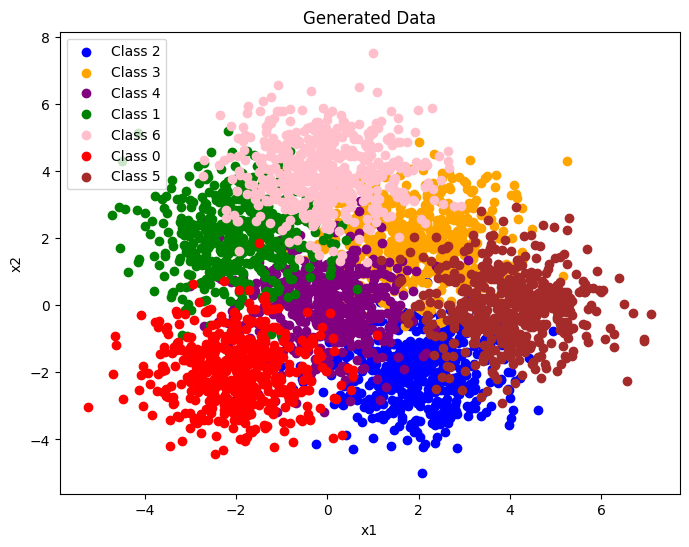

In [6]:
#Plot data
# Plot the data points by class
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']
for cls in data['target'].unique():
    plt.scatter(data[data['target'] == cls]['x1'], data[data['target'] == cls]['x2'],
                color=colors[cls], label=f'Class {cls}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Generated Data')
plt.legend(loc='upper left')
plt.show()


In [7]:
#Save the data
# Save the data to a CSV file
data.to_csv("generated_data.csv", index=False)
# Load the data from the saved CSV file
data = pd.read_csv("generated_data.csv")
print("Data loaded into DataFrame:")
print(data.head())


Data loaded into DataFrame:
         x1        x2  target
0  1.735485 -4.003862       2
1  4.049812  2.000683       3
2 -0.114802  0.566772       4
3 -1.261190  2.615367       1
4 -2.903702  2.324359       1


In [8]:
#Applying KNN on synthetic data
# KNN classification with different values of K
X = data[['x1', 'x2']]
y = data['target']
k_values = [1, 9, 17, 57, 101, 171, 215]



In [9]:
#Applying KNN on synthetic data
for k in k_values:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  accuracy = accuracy_score(y_test, knn.predict(X_test))
  print(f"Accuracy for k={k}: {accuracy:.2f}")



Accuracy for k=1: 0.74
Accuracy for k=9: 0.80
Accuracy for k=17: 0.80
Accuracy for k=57: 0.80
Accuracy for k=101: 0.80
Accuracy for k=171: 0.80
Accuracy for k=215: 0.80


In [10]:
# Classification Data
# Activity-1
# step 1:Generate Synthetic Data with 5 Overlapping Classes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Define parameters
n_samples = 3500
n_classes = 5
centers = np.array([[-2, -2], [-2, 2], [2, -2], [2, 2], [0, 0]])  # Overlapping centers

# Generate data with some overlap (higher cluster_std)
X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=1.2, random_state=42)


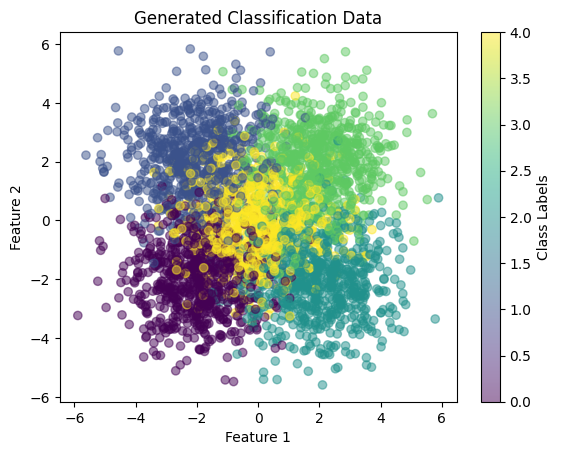

In [11]:
# step 2: Plot the Data
# Activity-1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar(label="Class Labels")
plt.title("Generated Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [12]:
# Step 3: Combine Features and Labels into a DataFrame
# Activity-1
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = y


In [13]:
# Activity-1
# Step 4: Save the Data to a CSV File
csv_filename = "classification_data.csv"
df.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")


Data saved to classification_data.csv


In [14]:
# Step 5: Reload the Data into a DataFrame
# Activity-1
df_loaded = pd.read_csv(csv_filename)


In [15]:
# Step 6: Split the Data into Training and Testing Sets
# Activity-1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_loaded[['Feature1', 'Feature2']], df_loaded['Class'], test_size=0.2, random_state=42)



In [16]:
# Activity-1
# Step 7: Apply KNN Classifier for K=7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for K=7: {accuracy:.2f}")


Accuracy for K=7: 0.77


In [18]:
# Step 8: Test Different Values of K
# Activity-1
k_values = [3, 9, 15, 45, 81, 135, 168]
accuracies = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f"Accuracy for K={k}: {acc:.2f}")



Accuracy for K=3: 0.74
Accuracy for K=9: 0.78
Accuracy for K=15: 0.78
Accuracy for K=45: 0.79
Accuracy for K=81: 0.79
Accuracy for K=135: 0.80
Accuracy for K=168: 0.80


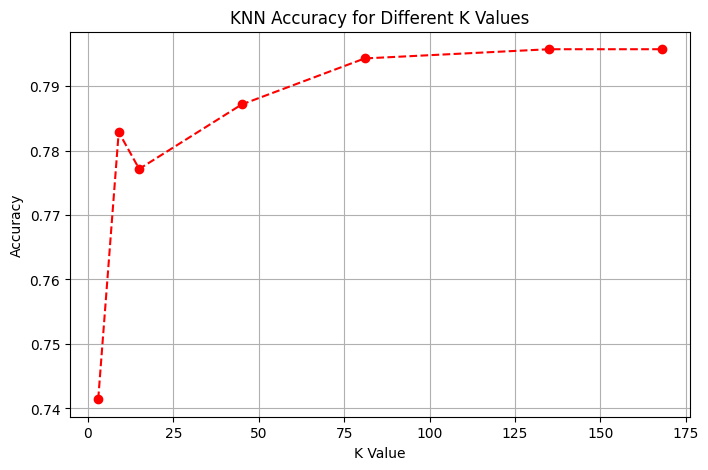

In [19]:
# Step 9: Plot KNN Accuracy for Different K Values
# Activity 1
plt.figure(figsize=(8, 5))
plt.plot(k_values, list(accuracies.values()), marker='o', linestyle='dashed', color='r')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.grid()
plt.show()


In [21]:
# Data Preprocessing
# Missing Values
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Create a sample dataset with missing values
data = {
    'A': [1, 2, None, 4, 5],
    'B': [6, None, 8, 9, 10],
    'C': [11, 12, 13, None, 15]
}
df = pd.DataFrame(data)
# Display the original DataFrame
print("Original DataFrame:")
print(df)


Original DataFrame:
     A     B     C
0  1.0   6.0  11.0
1  2.0   NaN  12.0
2  NaN   8.0  13.0
3  4.0   9.0   NaN
4  5.0  10.0  15.0


In [22]:
# Imputer
# Handling Missing Values
# Method 1: Drop rows with missing values
df_dropna_rows = df.dropna(axis=0)
# Method 2: Drop columns with missing values
df_dropna_columns = df.dropna(axis=1)
# Method 3: Fill missing values with the median
df_fill_median = df.fillna(df.median())
# Display results of missing value handling
print("\nDataFrame after dropping rows with missing values:")
print(df_dropna_rows)
print("\nDataFrame after dropping columns with missing values:")
print(df_dropna_columns)
print("\nDataFrame after filling missing values with the median:")
print(df_fill_median)




DataFrame after dropping rows with missing values:
     A     B     C
0  1.0   6.0  11.0
4  5.0  10.0  15.0

DataFrame after dropping columns with missing values:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

DataFrame after filling missing values with the median:
     A     B     C
0  1.0   6.0  11.0
1  2.0   8.5  12.0
2  3.0   8.0  13.0
3  4.0   9.0  12.5
4  5.0  10.0  15.0


In [23]:
# Categorical Attributes (Manual Method)
# Handling Categorical Attributes
# Manual Encoding Example
mapping = {'h': 1, 'u': 2, 't': 3}
features = pd.DataFrame({'Type': ['h', 'u', 't', 'h', 'u']})
features['Type'] = features['Type'].map(mapping)
print("\nEncoded Types:")
print(features.groupby('Type').size())



Encoded Types:
Type
1    2
2    2
3    1
dtype: int64


In [24]:
# Catagorical Attributes
# Using Label Encoding
le = LabelEncoder()
features['Regionname'] = ['North', 'South', 'East', 'West', 'North']
features['Region'] = le.fit_transform(features['Regionname'])
print("\nLabel Encoded Regions:")
print(features[['Regionname', 'Region']].value_counts())



Label Encoded Regions:
Regionname  Region
North       1         2
East        0         1
South       2         1
West        3         1
Name: count, dtype: int64


In [25]:
#Categorical Data (One Hot Encoding)
# One Hot Encoding Example
# Assuming 'Method' is a categorical column
features['Method'] = ['Method1', 'Method2', 'Method1', 'Method3', 'Method2']
df_one_hot = pd.get_dummies(features['Method'])
print("\nOne Hot Encoded DataFrame:")
print(df_one_hot.value_counts())



One Hot Encoded DataFrame:
Method1  Method2  Method3
False    True     False      2
True     False    False      2
False    False    True       1
Name: count, dtype: int64


In [26]:
# Activity 2
# Step 1: Create a Sample Dataset
import pandas as pd

# Create a sample dataset
data = {
    'Fruit': ['Apple', 'Banana', 'Grapes', 'Cherry', 'Lemon'],
    'Color': ['Red', 'Yellow', 'Green', 'Red', 'Yellow']
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df)


Original Dataset:
     Fruit   Color
0   Apple     Red
1  Banana  Yellow
2  Grapes   Green
3  Cherry     Red
4   Lemon  Yellow


In [27]:
# Activity 2
# Step 2: Apply One-Hot Encoding
# Perform one-hot encoding on 'Color' column
df_encoded = pd.get_dummies(df, columns=['Color'])

print("\nDataset after One-Hot Encoding:\n", df_encoded)



Dataset after One-Hot Encoding:
     Fruit  Color_Green  Color_Red  Color_Yellow
0   Apple        False       True         False
1  Banana        False      False          True
2  Grapes         True      False         False
3  Cherry        False       True         False
4   Lemon        False      False          True
